# Assigment 4 Unsupervised Learning

Nama : Muhammad Arsyad\
SCID : AI05113

In [ ]:
#import libary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# load data
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [ ]:
# hapus columns 'no'
data.drop('no', axis=1, inplace=True)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


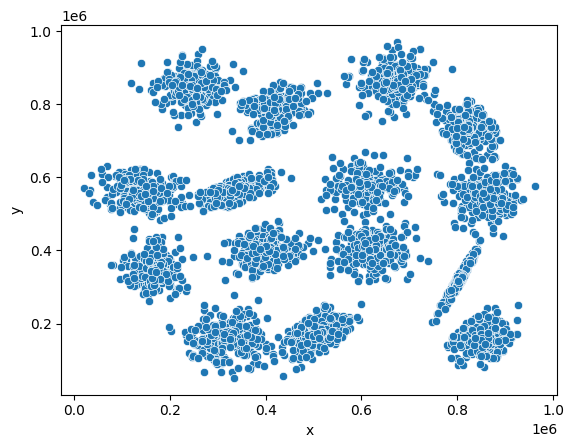

In [ ]:
# visualisasi
sns.scatterplot(data=data, x='x', y='y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

dari visualisasi yang terlihat, saya akan mencari berapa banyak cluster yang bagus dimulai dari 2 hingga 15 cluster, untuk mengetahui seberapa bagus banyak cluster yang dipakai, saya menggunakan silhouette

In [ ]:
# cari banyak cluster yang optimal

X = np.array(data)
scores = []
for n in range(2, 31):
  model = KMeans(n_clusters=n, random_state=1)
  model.fit(X)
  label = model.labels_
  score = silhouette_score(X, label)
  scores.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

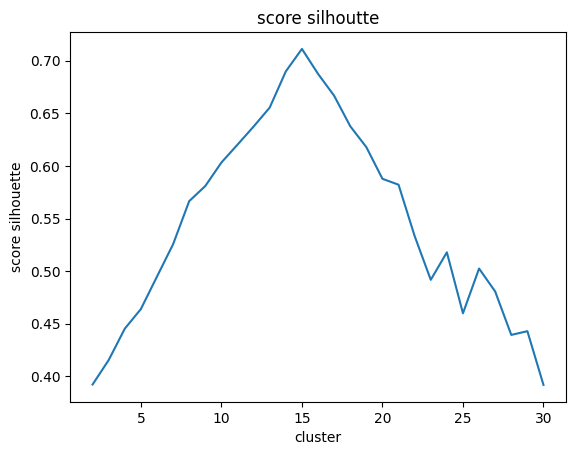

In [ ]:
# visualisasi score silhouette

plt.plot(list(range(2, 31)), scores)
plt.xlabel('cluster')
plt.ylabel('score silhouette')
plt.title('score silhoutte')
plt.show()

In [ ]:
#  dan mencari score tertinggi
scores_silhouette = pd.DataFrame(data=scores, index=list(range(2,31)))
best_cluster = scores_silhouette.idxmax()
print('best cluster : ', best_cluster)

best cluster :  0    15
dtype: int64


sehingga diperoleh bahwa dengan jumlah cluster 15 memperoleh score tertinggi

In [ ]:
# model
model = KMeans(n_clusters=15, random_state=1)
model.fit(X)
label = model.labels_
score = silhouette_score(X, label)
print('score : ', score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


score :  0.711278614093076


In [ ]:
# penggabungan label ke dalam data
result = data.copy()
result['cluster'] = label
result.head()

,x,y,cluster
0,664159,550946,6
1,665845,557965,6
2,597173,575538,6
3,618600,551446,6
4,635690,608046,6


In [ ]:
centroid = model.cluster_centers_

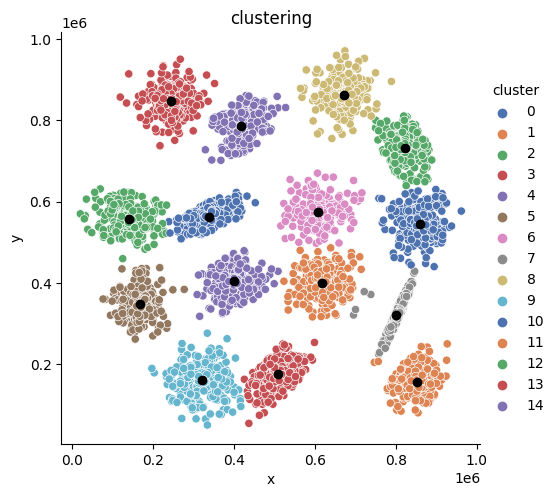

In [ ]:
# visualisasi hasil cluster
sns.relplot(data=result, x='x', y='y', hue='cluster', palette="deep")
plt.scatter(centroid[:,0], centroid[:,1], color='black', label='centroid')
plt.xlabel('x')
plt.ylabel('y')
plt.title('clustering')
plt.show()